In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [7]:
# Data preprocessing
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [8]:
# Data transformation
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(30, 2035):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# Reshaping the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Initialize the LSTM model
model = Sequential()

# Add the first LSTM layer with return_sequences=True
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add the second LSTM layer with return_sequences=True
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Add the third LSTM layer with return_sequences=True
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Add the fourth LSTM layer without return_sequences
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add the Dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=62)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0241
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0033
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0035
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0030
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0024
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0027
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0024
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0021
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0024
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0017
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0023
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0020
Epoch 13/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0020
Epoch 14/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0020
Epoch 15/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0023
Epoc

In [11]:
# Load the test dataset
url_test = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url_test)
real_stock_price = dataset_test.iloc[:, 1:2].values

# Prepare test inputs
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(30, 46):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


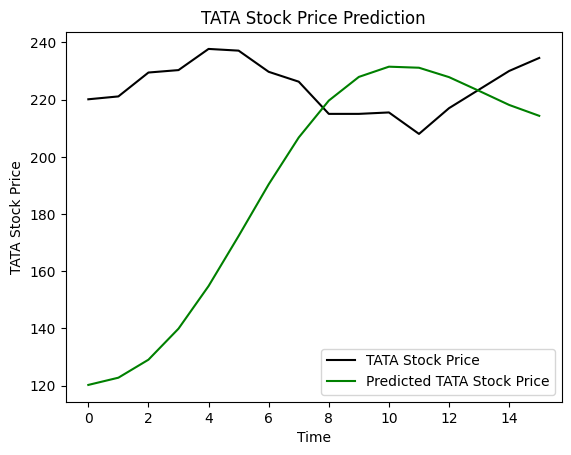

In [12]:
# Plot the results
plt.plot(real_stock_price, color='black', label='TATA Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [13]:
# Save the model
model.save('tata_model_lstm.h5')